# Импорты

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Загрузка данных

In [3]:
data_set_path = "data/WineQT.csv"
wine_data = pd.read_csv(data_set_path)
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


# Удаление столбца ID
### Из-за ненадобности

In [4]:
wine_data = wine_data.drop(columns=["Id"])

# Распределение вин по качеству

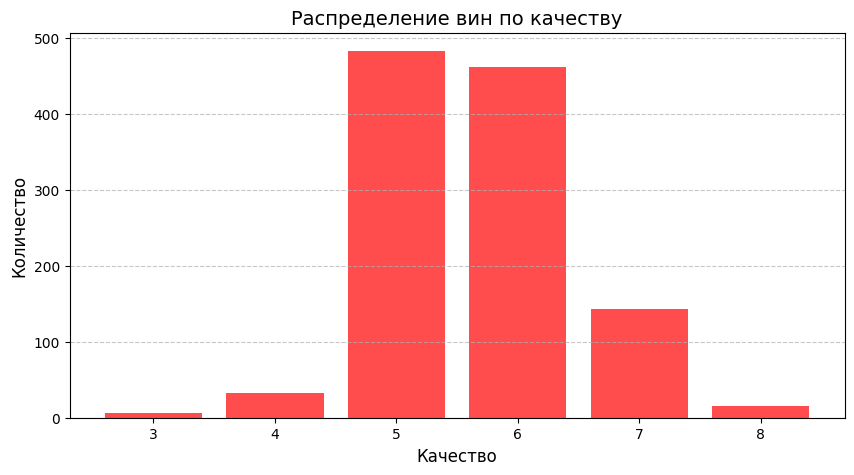

In [5]:
quality_count = wine_data["quality"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(quality_count.index, quality_count.values, color="red", alpha=0.7)
plt.title("Распределение вин по качеству", fontsize=14)
plt.xlabel("Качество", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.xticks(quality_count.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Исследование влияния различных факторов на качество вина
### С помощью корреляционной матрицы

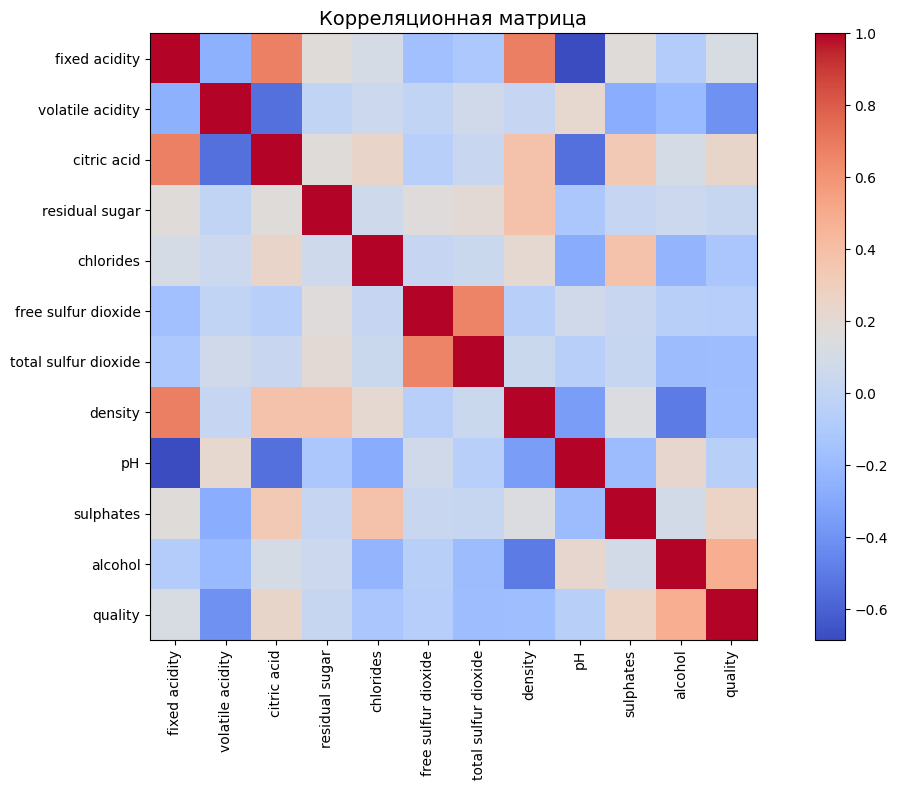

In [6]:
corr_matrix = wine_data.corr()

plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Корреляционная матрица", fontsize=14)
labels = corr_matrix.columns
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels)
plt.tight_layout()
plt.show()

In [7]:
quality_corr = corr_matrix["quality"].sort_values(ascending=False)

print("Корреляция факторов с качеством вина:")
print(quality_corr)

Корреляция факторов с качеством вина:
quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


# Гипотеза
## Содержание алкоголя оказывает влияние на качество вина. Среднее качество вина с высоким содержанием алкоголя выше, чем с низким.

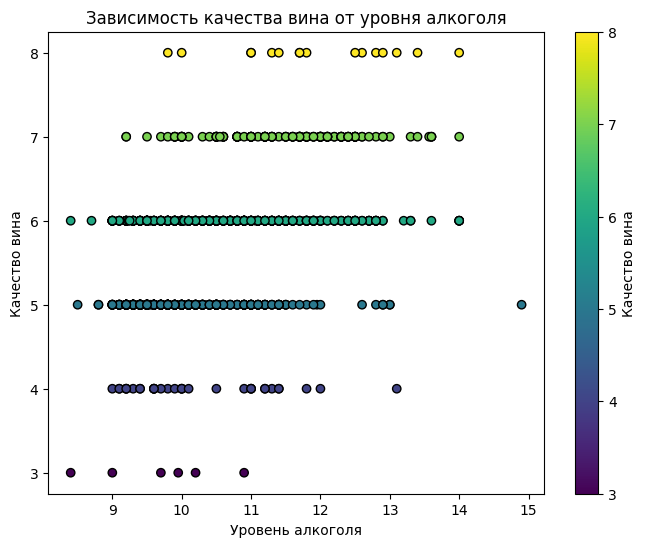

In [8]:
low_quality_wine = wine_data[wine_data["quality"] <= 5]["alcohol"]
high_quality_wine = wine_data[wine_data["quality"] > 5]["alcohol"]

plt.figure(figsize=(8, 6))
plt.scatter(wine_data["alcohol"], wine_data["quality"], c=wine_data["quality"], cmap="viridis", edgecolor='k')
plt.colorbar(label="Качество вина")
plt.title("Зависимость качества вина от уровня алкоголя")
plt.xlabel("Уровень алкоголя")
plt.ylabel("Качество вина")
plt.show()


In [12]:
stat, p_value = ttest_ind(low_quality_wine, high_quality_wine, equal_var=False)
print(f"Результаты t-теста:\nСтатистика = {stat:.5f}, p-значение = {p_value:.5f}")

if p_value < 0.05:
    print("Гипотеза не отклонена: уровень алкоголя влияет на качество вина.")
else:
    print("Гипотеза отклонена: уровень алкоголя не оказывает влияния на качество вина.")

Результаты t-теста:
Статистика = -17.06708, p-значение = 0.00000
Гипотеза не отклонена: уровень алкоголя влияет на качество вина.
